In [2]:
"""
气象数据分析及可视化
"""
import numpy as np
import pandas as pd
import datetime

# 加载数据
df_ferrara = pd.read_csv('WeatherData/ferrara_270615.csv')
df_milano = pd.read_csv('WeatherData/milano_270615.csv')
df_mantova = pd.read_csv('WeatherData/mantova_270615.csv')
df_ravenna = pd.read_csv('WeatherData/ravenna_270615.csv')
df_torino = pd.read_csv('WeatherData/torino_270615.csv')
df_asti = pd.read_csv('WeatherData/asti_270615.csv')
df_bologna = pd.read_csv('WeatherData/bologna_270615.csv')
df_piacenza = pd.read_csv('WeatherData/piacenza_270615.csv')
df_cesena = pd.read_csv('WeatherData/cesena_270615.csv')
df_faenza = pd.read_csv('WeatherData/faenza_270615.csv')



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser

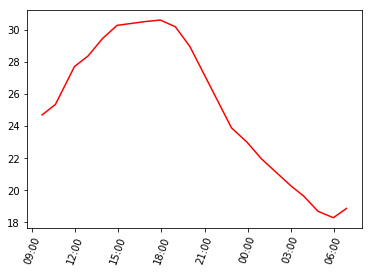

In [4]:
# 温度数据分析 米兰为例
# 取出要分析的温度和日期
y1 = df_milano['temp']
x1 = df_milano['day']

# 把日期转换成 datetime 格式
day_milano = [parser.parse(x) for x in x1]

# fig 是图形对象, ax 是坐标轴对象
fig, ax = plt.subplots()

# 调整x 轴坐标刻度，使其旋转70度
plt.xticks(rotation=70)

# 设定时间格式
hours = mdates.DateFormatter('%H:%M')

# 设定x 轴显示格式
ax.xaxis.set_major_formatter(hours)

# 绘图
ax.plot(day_milano, y1, 'r')

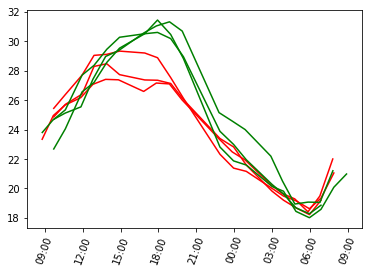

In [5]:
# 分析离海最近和最远的三个城市
# 读取温度和日期数据
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_faenza['temp']
x2 = df_faenza['day']
y3 = df_cesena['temp']
x3 = df_cesena['day']
y4 = df_milano['temp']
x4 = df_milano['day']
y5 = df_asti['temp']
x5 = df_asti['day']
y6 = df_torino['temp']
x6 = df_torino['day']

# 将日期从 string 转为 datetime 类型
day_ravenna = [parser.parse(x) for x in x1]
day_faenza = [parser.parse(x) for x in x2]
day_cesena = [parser.parse(x) for x in x3]
day_milano = [parser.parse(x) for x in x4]
day_asti = [parser.parse(x) for x in x5]
day_torino = [parser.parse(x) for x in x6]

# 重新定义
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)

# 离海最近的用红色, 远的用绿色
ax.plot(day_ravenna, y1, 'r', day_faenza, y2, 'r', day_cesena, y3, 'r')
ax.plot(day_milano,y4,'g',day_asti,y5,'g',day_torino,y6,'g')

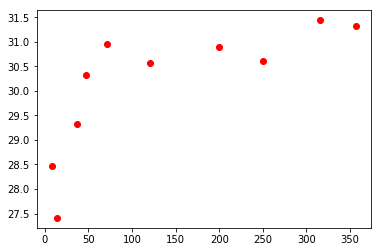

In [6]:
# 收集 10 个城市的最高温和最低温，用线性图表示气温最值点和离海远近之间的关系。
# 城市距离海边距离列表
dist = [df_ravenna['dist'][0],
    df_cesena['dist'][0],
    df_faenza['dist'][0],
    df_ferrara['dist'][0],
    df_bologna['dist'][0],
    df_mantova['dist'][0],
    df_piacenza['dist'][0],
    df_milano['dist'][0],
    df_asti['dist'][0],
    df_torino['dist'][0]
]

# 每个城市最高温度
temp_max = [df_ravenna['temp'].max(),
    df_cesena['temp'].max(),
    df_faenza['temp'].max(),
    df_ferrara['temp'].max(),
    df_bologna['temp'].max(),
    df_mantova['temp'].max(),
    df_piacenza['temp'].max(),
    df_milano['temp'].max(),
    df_asti['temp'].max(),
    df_torino['temp'].max()
]

# 每个城市最低温度
temp_min = [df_ravenna['temp'].min(),
    df_cesena['temp'].min(),
    df_faenza['temp'].min(),
    df_ferrara['temp'].min(),
    df_bologna['temp'].min(),
    df_mantova['temp'].min(),
    df_piacenza['temp'].min(),
    df_milano['temp'].min(),
    df_asti['temp'].min(),
    df_torino['temp'].min()
]

# 绘图
fig, ax = plt.subplots()
ax.plot(dist, temp_max, 'ro')



In [ ]:
# 用线性回归算法得到两条直线，分别表示两种不同的气温趋势
from sklearn.svm import SVR

# dist1 靠近海, dist2远离海
dist1 = dist[0:5]
dist2 = dist[5:10]

# 改变元素为列表
dist1 = [[x] for x in dist1]
dist2 = [[x] for x in dist2]

# dist1城市对应最高温度
temp_max1 = temp_max[0:5]
# dist2城市对应最高温度
temp_max2 = temp_max[5:10]

# 调用SVR，参数规定使用线性的拟合函数
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)

# 加入数据, 运行时间较长
svr_lin1.fit(dist1, temp_max1)
svr_lin2.fit(dist2, temp_max2)

# reshape
xp1 = np.arange(10,100,10).reshape((9,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)

# 绘图
ax.plot(xp1, yp1, c='b', label='Strong sea effect')
ax.plot(xp2, yp2, c='g', label='Light sea effect')
ax.plot(dist, temp_max, 'ro')
plt.show()

In [ ]:
print(svr_lin1.coef_)  #斜率
print(svr_lin1.intercept_)  # 截距
print(svr_lin2.coef_)
print(svr_lin2.intercept_)


In [ ]:
# 交叉点
from scipy.optimize import fsolve

# 定义一条拟合直线
def line1(x):
    a1 = svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return a1*x + b1

# 定义第二条拟合曲线
def line2(x):
    a2 = svr_lin2.coef_[0][0]
    b2 = svr_lin2.intercept_[0]
    return a2*x + b2

# 定义了找到两条直线的交点的 x 坐标的函数
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1,line2,0.0)
print("[x,y] = [ %d , %d ]" % (result,line1(result)))

# x = [0,10,20, ..., 300]
x = np.linspace(0,300,31)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')
